<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex03/larissa_santesso/Aula_3_Exerc%C3%ADcio_%5BNew%5D_Larissa_Santesso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Escreva aqui seu nome: Larissa Antonelli Santesso

# PyTorch: Gradientes e Grafo Computacional

## Objetivos

Este notebook introduz 
- o conceito de autograd do PyTorch,
- uma interpretação numérica intuitiva do gradiente, e o
- grafo computacional, utilizado para o cálculo automático do gradiente de uma função.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de
calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada
pelo tensor através do cálculo automático do gradiente pela construção dinâmica do grafo computacional.

## Grafo computacional

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para conhecer com maior profundidade a diferenciação automática usando grafo computacional, veja esta nota de aula:
https://cs231n.github.io/optimization-2/

In [1]:
import torch

In [2]:
torch.__version__

'1.10.0+cu111'

## Se um tensor possui .requires_grad=True

In [3]:
y = 2 * torch.arange(0,4).float()
y

tensor([0., 2., 4., 6.])

In [4]:
x = torch.arange(0,4).float(); x

tensor([0., 1., 2., 3.])

In [5]:
w = torch.ones(1,requires_grad=True); w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum ((x  w) - y)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

### Montagem do grafo computacional

In [6]:
# predict (forward)
y_pred = x * w

# cálculo da perda J: loss
e = y_pred - y
e2 = e.pow(2)
J = e2.sum()
J

tensor(14., grad_fn=<SumBackward0>)

## Auto grad - processa o grafo computacional backwards

O `backward()` varre o grafo computacional a partir da variável a ele associada e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
O `backward()` destroi o grafo após sua execução. Isso é intrínsico ao PyTorch pelo fato dele ser uma rede dinâmica.

In [7]:
J.backward()
print(w.grad)

tensor([-28.])


In [8]:
w.grad.data.zero_();

## Interpretação do Gradiente

O gradiente de uma variável final (J) com respeito à outra variável de entrada (w) pode ser interpretado como o quanto a variável final J vai aumentar se houver um pequeno aumento na variável de entrada (w).
Por exemplo suponha que o gradiente seja 28. Isto significa se aumentarmos a variável w de 0.001, então J vai aumentar de 0.028.

In [9]:
eps = 0.001
y_pred = x * (w + eps)
J_new = (y_pred - y).pow(2).sum()
J_new

tensor(13.9720, grad_fn=<SumBackward0>)

In [10]:
print(J_new - J)

tensor(-0.0280, grad_fn=<SubBackward0>)


## Backpropagation

Uma forma equivalente explícita de calcular o gradiente é fazendo o processamento do backpropagation no grafo computacional, de forma explícita.
Apenas como ilustração.

In [11]:
import numpy as np

dJ = 1.
de2 = dJ * np.ones((4,))
de = de2 * 2 * e.data.numpy()
dy_pred = de
dw = (dy_pred * x.data.numpy()).sum()
print(dJ)
print(de2)
print(de)
print(dw)

1.0
[1. 1. 1. 1.]
[ 0. -2. -4. -6.]
-28.0


## Visualizando o grafo computacional

In [12]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=90442919924c47061998cf97e7f371833221ae5fa21a34bfd657fdca15774230
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


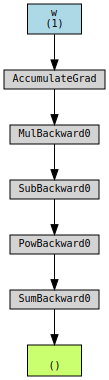

In [13]:
import torchviz
J = ((w * x) - y).pow(2).sum()
p = {'w':w} # dicionário de parâmetros
out = torchviz.make_dot(J,params=p)
out

Iremos agora visualizar a Resnet, que é uma rede neural bastante popular em visão computacional.

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

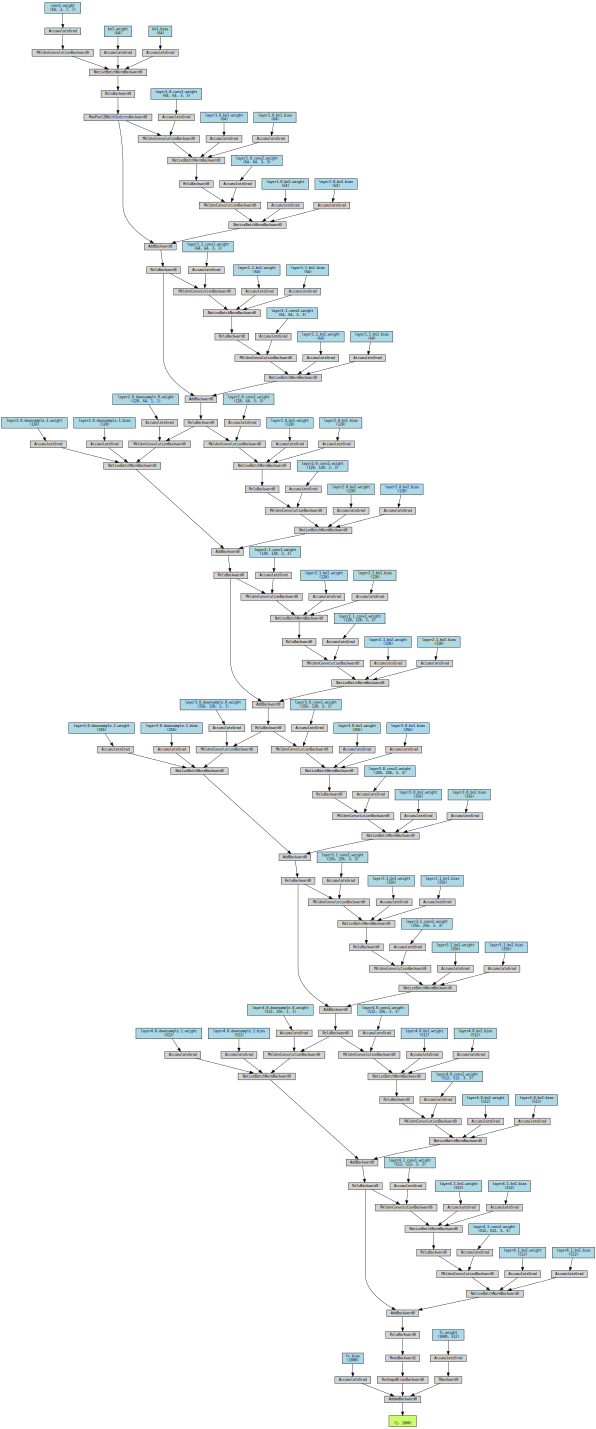

In [14]:
import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
x_temp = torch.randn(1,3,224,224)  # First, create a random image.
y_temp = model(x_temp)  # We need one forward pass so the graph can be build.
out = torchviz.make_dot(y_temp, params=dict(model.named_parameters()))  # Create a figure from the computaional graph..
torchviz.dot.resize_graph(out, size_per_element=0.05)  # Resize to fit on the screen.
out

# Exercício 1

O que acontece com o grafo computacional após execução do `backward()`?

Resposta:  Após a execução do` backward`, o grafo computacional é destruído, isso tudo é intrínsico do PyTorch, pelo fato de ser uma rede dinâmica. 

# Exercício 2

Execute um passo de atualização do valor de w, pelo 
gradiente descendente. Utilize um fator de aprendizado (*learning rate*) de 0.01 
para atualizar o `w`. Após, recalcule a função de perda:

    - w = w - lr * w.grad.data
    - Verifique o quanto que a perda J diminuiu

In [15]:
w

tensor([1.], requires_grad=True)

In [16]:
J = (y_pred - y).pow(2).sum()
print(f"J = {J}")

J.backward()
print(f"Gradiente = {w.grad.data}")

wnew = w - 0.01*w.grad.data
print(f"w = {w}")
print(f"Diferença entre w anterior e w novo = {wnew-w}")
y_pred = x * (wnew)
J_new2 = (y_pred - y).pow(2).sum()
print(f"J = {J_new2}")

print(f"J diminuiu {abs(J_new2-J_new)}")

J = 13.97201156616211
Gradiente = tensor([-27.9720])
w = tensor([1.], requires_grad=True)
Diferença entre w anterior e w novo = tensor([0.2797], grad_fn=<SubBackward0>)
J = 7.263246536254883
J diminuiu 6.708765029907227


In [17]:
eps = 0.001
y_pred = x * (w + eps)
J_new = (y_pred - y).pow(2).sum()
J_new

tensor(13.9720, grad_fn=<SumBackward0>)

## Treinando uma rede no Pytorch

Para ajudar na entendimento dos exercícios abaixo, apresentamos o código em Pytorch para treinar uma rede de uma camada não-linear, com pesos `w` e `b`:
$y' = \sigma(wx + b)$

<img src="https://github.com/robertoalotufo/files/blob/master/figures/simple_graph.png?raw=true" width="600pt"/>

In [18]:
# É importante fixar as seeds para passar nos asserts abaixo.

import random
import numpy as np
import torch

random.seed(123)
np.random.seed(123)
torch.manual_seed(123)

In [19]:
from typing import List

class NonLinearPytorch(torch.nn.Module):
    def __init__(self):
        super(NonLinearPytorch, self).__init__()

        self.layer1 = torch.nn.Linear(1, 1)
        # Inicializa os pesos w e b em zero.
        self.layer1.load_state_dict(dict(weight=torch.zeros(1,1), bias=torch.zeros(1)))
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.layer1(x))
        return y_pred

learning_rate = 0.1
model = NonLinearPytorch()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
x = torch.tensor([-5], dtype=torch.float)
y_target = torch.tensor([0.76], dtype=torch.float)
num_iterations = 50
for i in range(num_iterations):
    # Zere os gradientes dos passo anterior.
    optimizer.zero_grad()
    # Rode a um passo forward do modelo.
    y_pred = model.forward(x)
    # Calcule a loss
    loss = loss_fn(y_pred, y_target)
    # Calcule os gradientes
    loss.backward()
    # Atualize os pesos
    optimizer.step()

    print(f'iter:{i}: y_prime: {y_pred}')

iter:0: y_prime: tensor([0.5000], grad_fn=<SigmoidBackward0>)
iter:1: y_prime: tensor([0.5837], grad_fn=<SigmoidBackward0>)
iter:2: y_prime: tensor([0.6366], grad_fn=<SigmoidBackward0>)
iter:3: y_prime: tensor([0.6702], grad_fn=<SigmoidBackward0>)
iter:4: y_prime: tensor([0.6926], grad_fn=<SigmoidBackward0>)
iter:5: y_prime: tensor([0.7083], grad_fn=<SigmoidBackward0>)
iter:6: y_prime: tensor([0.7196], grad_fn=<SigmoidBackward0>)
iter:7: y_prime: tensor([0.7281], grad_fn=<SigmoidBackward0>)
iter:8: y_prime: tensor([0.7345], grad_fn=<SigmoidBackward0>)
iter:9: y_prime: tensor([0.7395], grad_fn=<SigmoidBackward0>)
iter:10: y_prime: tensor([0.7435], grad_fn=<SigmoidBackward0>)
iter:11: y_prime: tensor([0.7466], grad_fn=<SigmoidBackward0>)
iter:12: y_prime: tensor([0.7491], grad_fn=<SigmoidBackward0>)
iter:13: y_prime: tensor([0.7511], grad_fn=<SigmoidBackward0>)
iter:14: y_prime: tensor([0.7527], grad_fn=<SigmoidBackward0>)
iter:15: y_prime: tensor([0.7540], grad_fn=<SigmoidBackward0>)
it

# Exercício 3

Vamos agora escrever nosso próprio código para calcular os gradientes da rede apresentada acima.

Para tanto, temos que primeiro implementar a classe Tensor, que é parecida com a classe Tensor do pytorch. Quando instanciada, o objeto resultante armazena o valor do tensor e uma referencia para o nó do grafo computacional que gerou os valores do tensor, quando houver. Com isso podemos construir percorrer o grafo computacional no sentido reverso, realizando o passo `backward` do algoritmo de backpropagation.

Para simplificar a implementação, o gradiente também pode ser armazenado nesta variável. Com isso, podemos tratar os pesos da rede como Tensor's. Isso dispensa a necessidade de criarmos a classe Parameters, como é feito no pytorch.

In [20]:
class Tensor():
    def __init__(self, data: float, previous_node=None):
        self.data = data
        self.previous_node = previous_node
        self.grad = 0.0

    def backward(self, upstream_grad: float = None):
        # Se não houver um gradiente da frente, isso quer dizer que se refere
        # ao último item (loss), portanto dL/dL = 1
        if upstream_grad is None: upstream_grad = 1.0

        # Esta vai ser uma chamada recursiva cujo critéria de parada é quando previous_node==None.
        if self.previous_node is not None:
            self.previous_node.backward(upstream_grad)
        

    # Implementar as funções abaixo é opcional.
    def __add__(self, other: 'Tensor'):
        return self.data + other.data

    def __sub__(self, other: 'Tensor'):
        return self.data - other.data

    def __mul__(self, other: 'Tensor'):
        return self.data * other.data

    def __pow__(self, other: int):
        return self.data**other

A seguir, implementaremos as funções `forward` e `backward` de cada um dos nós do grafo acima, além do nó de subtração, que é usado pela função de custo.
Vamos começar pelo nó da função sigmoid ($\sigma$), cuja derivada é:

$\frac{\delta\sigma}{\delta x} = \sigma(x)(1-\sigma(x))$

In [21]:
class SigmoidNode():
    def forward(self, x: Tensor):
        self.x = x
        self.sigma = 1.0/(1.0+np.exp(-1.0*self.x.data))
        z = Tensor(self.sigma, previous_node=self) # Com previous_node=self começa-se a construir o grafo com os nós (gates)
        return z

    def backward(self, upstream_grad: float):
        grad_local = self.sigma*(1-self.sigma)
        grad = grad_local*upstream_grad
        self.x.grad += grad # ideia de somar o gradiente com o já existente baseado no 
        # notebook do aluno Leonardo Augusto da Silva Pacheco e será utilizada nos próximos gradientes

        print(f"SigmoidNode -> upstream_grad = {upstream_grad}")
        print(f"SigmoidNode -> grad_x = {grad}")

        if self.x.previous_node is not None:
            self.x.previous_node.backward(grad)

Implementamos agora o `forward` e `backward` do nó da soma $z = x + y$, cujas derivadas parciais em relação a cada entrada $x$ e $y$ são:

$\frac{\delta z}{\delta x} = 1$

$\frac{\delta z}{\delta y} = 1$

In [22]:
class AddNode():
    def forward(self, x: Tensor, y: Tensor):
        self.x = x
        self.y = y
        z = Tensor(self.x +self.y, previous_node=self) 
        return z
      
    def backward(self, upstream_grad: float):
        # A operação de soma tem o objetivo de ser um "distribuidor", logo a derivada de z /derivada de x = 1 
        # basta então, multiplicar 1 (gradiente local) pelo gradiente da frente.
        grad_local_x = 1
        grad_local_y = 1

        grad_x = grad_local_x*upstream_grad
        grad_y = grad_local_y*upstream_grad

        self.x.grad += grad_x
        self.y.grad += grad_y

        print(f"AddNode -> upstream_grad = {upstream_grad}")
        print(f"AddNode -> grad_x = {grad_x}")
        print(f"AddNode -> grad_y = {grad_y}")

        if self.x.previous_node is not None:
            self.x.previous_node.backward(grad_x)
        if self.y.previous_node is not None:
            self.y.previous_node.backward(grad_y)

Implementamos agora o `forward` e `backward` do nó da subtração $z = x - y$, cujas derivadas parciais em relação a cada entrada $x$ e $y$ são:

$\frac{\delta z}{\delta x} = 1$

$\frac{\delta z}{\delta y} = -1$

In [23]:
class SubNode():
    def forward(self, x: Tensor, y: Tensor):
        self.x = x
        self.y = y
        z = Tensor(self.x - self.y, previous_node=self) 
        return z

    def backward(self, upstream_grad: float):
        # A operação de soma tem o objetivo de ser um "distribuidor", logo a derivada de z /derivada de x = 1 
        # basta então, multiplicar 1 (gradiente local) pelo gradiente da frente.
        grad_local_x = 1
        grad_local_y = -1

        grad_x = grad_local_x*upstream_grad
        grad_y = grad_local_y*upstream_grad

        self.x.grad += grad_x
        self.y.grad += grad_y

        print(f"SubNode -> upstream_grad = {upstream_grad}")
        print(f"SubNode -> grad_x = {grad_x}")
        print(f"SubNode -> grad_y = {grad_y}")
        
        if self.x.previous_node is not None:
            self.x.previous_node.backward(grad_x)
        if self.y.previous_node is not None:
            self.y.previous_node.backward(grad_y)

Implementamos agora o `forward` e `backward` do nó da multiplicação $z = xy$, cujas derivadas parciais em relação a cada entrada $x$ e $y$ são:

$\frac{\delta z}{\delta x} = y$

$\frac{\delta z}{\delta y} = x$

In [24]:
class MulNode():
    def forward(self, x: Tensor, y: Tensor):
        self.x = x
        self.y = y
        z = Tensor(self.x * self.y, previous_node=self) 
        return z

    def backward(self, upstream_grad: float):
        grad_local_x = self.y.data
        grad_local_y = self.x.data

        grad_x = grad_local_x*upstream_grad
        grad_y = grad_local_y*upstream_grad

        self.x.grad += grad_x
        self.y.grad += grad_y

        print(f"MulNode -> upstream_grad = {upstream_grad}")
        print(f"MulNode -> grad_x = {grad_x}")
        print(f"MulNode -> grad_y = {grad_y}")
        
        if self.x.previous_node is not None:
            self.x.previous_node.backward(grad_x)
        if self.y.previous_node is not None:
            self.y.previous_node.backward(grad_y)

O Nó `SqrNode()` eleva ao quadrado na direção *forward*, e calcula o gradiente durante o *backward*. A derivada parcial da função é: 

$\frac{\delta z}{\delta x} = 2 x$

In [25]:
class SqrNode():
    def forward(self, x: Tensor):
        self.x = x
        z = Tensor(self.x.data**2, previous_node=self) 
        return z

    def backward(self, upstream_grad: float):
        grad_local_x = 2.0*self.x.data
        grad_x = grad_local_x*upstream_grad
        self.x.grad += grad_x

        print(f"SqrNode -> upstream_grad = {upstream_grad}")
        print(f"SqrNode -> grad_x = {grad_x}")
        
        if self.x.previous_node is not None:
            self.x.previous_node.backward(grad_x)

Agora que temos todos os nós implementados, podemos implementar as funções `forward` e `backward` de uma camada não-linear.

In [26]:
class NonLinear():
    def __init__(self):
        self.w = Tensor(0.0)
        self.b = Tensor(0.0)
        self.sigmoid = SigmoidNode()
        self.add = AddNode()
        self.mul = MulNode()

    def forward(self, x: Tensor):
        print("Entrou no modelo")
        ypred = self.add.forward(self.mul.forward(self.w,x),self.b)
        return self.sigmoid.forward(ypred)

Para treinar esta rede, usaremos a função de custo Mean Squared Error (MSE):

$L = (y_\text{pred} - y_\text{target})^2$

Como por simplicidade optamos por não criar o nó de exponenciação, iremos substituir a operação de elevar ao quadrado pela multiplicacão das diferenças:
$L = (y_\text{pred} - y_\text{target}) * (y_\text{pred} - y_\text{target})$


In [27]:
def compute_loss(y_target: Tensor, y_pred: Tensor):
    sub = SubNode()
    mul = MulNode()
    #square = SqrNode()
    s = sub.forward(y_pred,y_target)
    print("Entrou na função: compute_loss")
    #return square.forward(s)
    return mul.forward(s,s)
    

Também precisamos criar a classe do optimizador SGD, para atualizar os pesos da rede.

In [28]:
class SGD():
    def __init__(self, parameters: List[Tensor], learning_rate: float):
        self.parameters = parameters
        self.lr = learning_rate

    def step(self):
        for parameter in self.parameters:
            print(f"Antes da atualização do SGD: parameter = {parameter.data}")
            print(f"parameter.grad = {parameter.grad}")
            parameter.data = parameter.data - self.lr * parameter.grad
            print(f"Depois da atualização do SGD: parameter = {parameter.data}")
            
    def zero_grad(self):
        for parameter in self.parameters:
            parameter.grad = 0

Por fim, vamos aprender os pesos `w` e `b` para mapear um valor de entrada $x$ para um valor de saída $y_\text{target}$. Para isso, inicializamos o grafo da rede e rodamos o laço de optimização, que vai aplicar a descida do gradiente a cada iteração:

In [29]:
learning_rate = 0.1

model = NonLinear()
optimizer = SGD(parameters=[model.w, model.b], learning_rate=learning_rate)
x = Tensor(-5)
y_target = Tensor(0.76)
num_iterations = 50
loss_history = []
for i in range(num_iterations):
    # Zera os gradientes dos passo anterior.
    optimizer.zero_grad()
    # Roda a um passo forward do modelo.
    y_pred = model.forward(x)
    # Calcula o gradiente do erro, data a predição do modelo.
    loss = compute_loss(y_target=y_target, y_pred=y_pred)
    # Calcula agora os gradientes de w e b usando a função backward do modelo.
    loss.backward()
    # Atualiza os pesos w e b usando os seus respectivos gradientes.
    optimizer.step()
    loss_history.append(loss.data)
    print(f'iter:{i}: y_prime: {y_pred.data}')
    print("-------------------------------------------------")

Entrou no modelo
Entrou na função: compute_loss
MulNode -> upstream_grad = 1.0
MulNode -> grad_x = -0.26
MulNode -> grad_y = -0.26
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = 0.325
MulNode -> grad_y = -0.0
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = 0.325
MulNode -> grad_y = -0.0
Antes da atualização do SGD: parameter = 0.0
parameter.grad = 0.65
Depois da atualização do SGD: parameter = -0.065
Antes da atualização do SGD: parameter = 0.0
parameter.grad = -0.13
Depois da atualização do SGD: param

In [30]:
# Assert do histórico de losses
target_loss_history = np.array([
    0.06760000000000001,
    0.03108006193722489,
    0.015220506198982053,
    0.008060932337170576,
    0.004541161563163106,
    0.002676716778416733,
    0.0016309590258538709,
    0.0010186197676265991,
    0.0006482050773556802,
    0.0004184778055808091,
    0.0002732213666940629,
    0.0001799723631408175,
    0.00011938724006066084,
    7.964556795580347e-05,
    5.337529235755546e-05,
    3.590189694852957e-05,
    2.4221066975987528e-05,
    1.6380519943303855e-05,
    1.1100104701260794e-05,
    7.534158921382263e-06,
    5.1206312225268915e-06,
    3.484091178521846e-06,
    2.372728572773017e-06,
    1.6170734761536686e-06,
    1.102751559255297e-06,
    7.523936056219261e-07,
    5.135628032851034e-07,
    3.506642035854199e-07,
    2.395039343745027e-07,
    1.6361975051076568e-07,
    1.1180029104756559e-07,
    7.64046255502172e-08,
    5.222203675240293e-08,
    3.5697304881109e-08,
    2.440373411811497e-08,
    1.6684360766998337e-08,
    1.1407478782586943e-08,
    7.799952038419558e-09,
    5.333502713018058e-09,
    3.6471049454669566e-09,
    2.4940004563648322e-09,
    1.70551347969202e-09,
    1.1663324261807554e-09,
    7.976210871191926e-10,
    5.454773999550763e-10,
    3.7304544385265726e-10,
    2.55123652632966e-10,
    1.744789425625632e-10,
    1.1932681701419737e-10,
    8.160849280968648e-11])

assert np.allclose(np.array(loss_history), target_loss_history, atol=1e-6)

In [31]:
loss_history

[0.06760000000000001,
 0.03108006193722489,
 0.015220506198982053,
 0.008060932337170576,
 0.004541161563163106,
 0.002676716778416733,
 0.0016309590258538709,
 0.0010186197676265991,
 0.0006482050773556802,
 0.0004184778055808091,
 0.0002732213666940629,
 0.0001799723631408175,
 0.00011938724006066084,
 7.964556795580347e-05,
 5.337529235755546e-05,
 3.590189694852957e-05,
 2.4221066975987528e-05,
 1.6380519943303855e-05,
 1.1100104701260794e-05,
 7.534158921382263e-06,
 5.1206312225268915e-06,
 3.484091178521846e-06,
 2.372728572773017e-06,
 1.6170734761536686e-06,
 1.102751559255297e-06,
 7.523936056219261e-07,
 5.135628032851034e-07,
 3.506642035854199e-07,
 2.395039343745027e-07,
 1.6361975051076568e-07,
 1.1180029104756559e-07,
 7.64046255502172e-08,
 5.222203675240293e-08,
 3.5697304881109e-08,
 2.440373411811497e-08,
 1.6684360766998337e-08,
 1.1407478782586943e-08,
 7.799952038419558e-09,
 5.333502713018058e-09,
 3.6471049454669566e-09,
 2.4940004563648322e-09,
 1.705513479692

# Exercício 4

Repita o exercício 3 mas usando uma rede com duas camadas não-lineares:

$a = \sigma(w_1x + b_1)$

$y' = \sigma(w_2a + b_2)$


In [32]:
class Net():
    def __init__(self):
        self.layer1 = NonLinear()
        self.layer2 = NonLinear()

    def forward(self, x: Tensor):
        a = self.layer1.forward(x)
        ypred = self.layer2.forward(a)
        return ypred

In [33]:
learning_rate = 1.0

model = Net()
optimizer = SGD(parameters=[model.layer1.w, model.layer1.b, model.layer2.w, model.layer2.b], learning_rate=learning_rate)
x = Tensor(-5)
y_target = Tensor(0.76)
num_iterations = 50
loss_history = []
for i in range(num_iterations):
    # Zera os gradientes dos passo anterior.
    optimizer.zero_grad()
    # Roda a um passo forward do modelo.
    y_pred = model.forward(x)
    # Calcula o gradiente do erro, data a predição do modelo.
    loss = compute_loss(y_target=y_target, y_pred=y_pred)
    # Calcula agora os gradientes de w e b usando a função backward do modelo.
    loss.backward()
    # Atualiza os pesos w e b usando os seus respectivos gradientes.
    optimizer.step()
    loss_history.append(loss.data)

    print(f'iter:{i}: y_prime: {y_pred.data}')
    print("-------------------------------------------------")

Entrou no modelo
Entrou no modelo
Entrou na função: compute_loss
MulNode -> upstream_grad = 1.0
MulNode -> grad_x = -0.26
MulNode -> grad_y = -0.26
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = -0.0325
MulNode -> grad_y = -0.0
SigmoidNode -> upstream_grad = -0.0
SigmoidNode -> grad_x = -0.0
AddNode -> upstream_grad = -0.0
AddNode -> grad_x = -0.0
AddNode -> grad_y = -0.0
MulNode -> upstream_grad = -0.0
MulNode -> grad_x = 0.0
MulNode -> grad_y = -0.0
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = -0.

In [34]:
# Assert do histórico de losses
target_loss_history = np.array([
    0.06760000000000001,
    0.04816451784326003,
    0.03441893949967674,
    0.024685869154550014,
    0.017779518514339895,
    0.012865672147580373,
    0.009357930442551227,
    0.006843854944228629,
    0.005033355153684456,
    0.003722486916596324,
    0.002767860127525519,
    0.002068519037319172,
    0.0015531727586461292,
    0.001171256605013691,
    0.0008867097250423786,
    0.0006736562851878449,
    0.0005134081578305322,
    0.00039237986185759277,
    0.00030063198160464033,
    0.00023084800404160196,
    0.0001776110422089531,
    0.00013688907444861002,
    0.00010566603751232631,
    8.167562040111844e-05,
    6.320787765847752e-05,
    4.8967839833139685e-05,
    3.797151234545809e-05,
    2.9468940940422566e-05,
    2.2886999002965188e-05,
    1.778663376632945e-05,
    1.3830774434900419e-05,
    1.0760144929813144e-05,
    8.37496647215546e-06,
    6.521069100328111e-06,
    5.07931761304956e-06,
    3.957538836299656e-06,
    3.0843432785441995e-06,
    2.4043861297584576e-06,
    1.874725053962448e-06,
    1.4620159502394981e-06,
    1.1403504552510215e-06,
    8.89585959590245e-07,
    6.94054335088378e-07,
    5.415623658353852e-07,
    4.2261721020193424e-07,
    3.298256981859764e-07,
    2.574280800457942e-07,
    2.0093587846657402e-07,
    1.568504247743093e-07,
    1.2244398229883047e-07
    ])

assert np.allclose(np.array(loss_history), target_loss_history, atol=1e-6)

In [35]:
loss_history

[0.06760000000000001,
 0.04816451784326003,
 0.03441893949967674,
 0.024685869154550014,
 0.017779518514339895,
 0.012865672147580373,
 0.009357930442551227,
 0.006843854944228629,
 0.005033355153684456,
 0.003722486916596324,
 0.002767860127525519,
 0.002068519037319172,
 0.0015531727586461292,
 0.001171256605013691,
 0.0008867097250423786,
 0.0006736562851878449,
 0.0005134081578305322,
 0.00039237986185759277,
 0.00030063198160464033,
 0.00023084800404160196,
 0.0001776110422089531,
 0.00013688907444861002,
 0.00010566603751232631,
 8.167562040111844e-05,
 6.320787765847752e-05,
 4.8967839833139685e-05,
 3.797151234545809e-05,
 2.9468940940422566e-05,
 2.2886999002965188e-05,
 1.778663376632945e-05,
 1.3830774434900419e-05,
 1.0760144929813144e-05,
 8.37496647215546e-06,
 6.521069100328111e-06,
 5.07931761304956e-06,
 3.957538836299656e-06,
 3.0843432785441995e-06,
 2.4043861297584576e-06,
 1.874725053962448e-06,
 1.4620159502394981e-06,
 1.1403504552510215e-06,
 8.89585959590245e-0

# Exercício 5

Repita o exercício 4 mas compartilhando os pesos das duas camadas não-lineares. Mostre que ambas tem os mesmos pesos após o treino.

In [36]:
class NetShared():
    def __init__(self):
        self.layer1 = NonLinear()
        self.layer2 = NonLinear()
        self.layer2.w = self.layer1.w
        self.layer2.b = self.layer1.b

    def forward(self, x: Tensor):
        a = self.layer1.forward(x)
        ypred = self.layer2.forward(a)

        return ypred

In [37]:
learning_rate = 1

model = NetShared()
optimizer = SGD(parameters=[model.layer1.w, model.layer1.b, model.layer2.w, model.layer2.b], learning_rate=learning_rate)
x = Tensor(-5)
y_target = Tensor(0.76)
num_iterations = 50
loss_history = []
for i in range(num_iterations):
    # Zera os gradientes dos passo anterior.
    optimizer.zero_grad()
    # Roda a um passo forward do modelo.
    y_pred = model.forward(x)
    # Calcula o gradiente do erro, data a predição do modelo.
    loss = compute_loss(y_target=y_target, y_pred=y_pred)
    # Calcula agora os gradientes de w e b usando a função backward do modelo.
    loss.backward()
    # Atualiza os pesos w e b usando os seus respectivos gradientes.
    optimizer.step()
    loss_history.append(loss.data)
    print(f'iter:{i}: y_prime: {y_pred.data}')
    print("-------------------------------------------------")

Entrou no modelo
Entrou no modelo
Entrou na função: compute_loss
MulNode -> upstream_grad = 1.0
MulNode -> grad_x = -0.26
MulNode -> grad_y = -0.26
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = -0.0325
MulNode -> grad_y = -0.0
SigmoidNode -> upstream_grad = -0.0
SigmoidNode -> grad_x = -0.0
AddNode -> upstream_grad = -0.0
AddNode -> grad_x = -0.0
AddNode -> grad_y = -0.0
MulNode -> upstream_grad = -0.0
MulNode -> grad_x = 0.0
MulNode -> grad_y = -0.0
SubNode -> upstream_grad = -0.26
SubNode -> grad_x = -0.26
SubNode -> grad_y = 0.26
SigmoidNode -> upstream_grad = -0.26
SigmoidNode -> grad_x = -0.065
AddNode -> upstream_grad = -0.065
AddNode -> grad_x = -0.065
AddNode -> grad_y = -0.065
MulNode -> upstream_grad = -0.065
MulNode -> grad_x = -0.

In [38]:
# Assert do histórico de losses
target_loss_history = np.array([
    0.06760000000000001,
    0.03330943358728514,
    0.01812309304377204,
    0.010431455731754344,
    0.00628328726800519,
    0.003921585863693047,
    0.002515913769956196,
    0.0016490770012327091,
    0.001099269875970989,
    0.0007426407360579466,
    0.0005071214254096055,
    0.00034931071712997896,
    0.0002423146970980538,
    0.00016906818320206488,
    0.00011852649897990173,
    8.34225019207209e-05,
    5.8908072936428374e-05,
    4.1711214955750446e-05,
    2.9602068987044087e-05,
    2.104850477904461e-05,
    1.4990519614837506e-05,
    1.0690478374361229e-05,
    7.632552514629166e-06,
    5.454526520113034e-06,
    3.901160939771698e-06,
    2.7920656777350508e-06,
    1.9994311078486844e-06,
    1.4325100419623816e-06,
    1.0267548557132565e-06,
    7.361838049377913e-07,
    5.279988583833094e-07,
    3.787802854699951e-07,
    2.717896235939522e-07,
    1.9505429520143487e-07,
    1.4000497904948548e-07,
    1.0050478927006106e-07,
    7.215673640396385e-08,
    5.180917660144311e-08,
    3.7202327787478815e-08,
    2.6715420845967644e-08,
    1.9185717920921844e-08,
    1.377889958835379e-08,
    9.896197179203946e-09,
    7.10782660599054e-09,
    5.105258647978467e-09,
    3.6669857031273956e-09,
    2.633962683117349e-09,
    1.8919845693984993e-09,
    1.3590391851568933e-09,
    9.762292271381411e-10
    ])

assert np.allclose(np.array(loss_history), target_loss_history, atol=1e-6)

In [39]:
loss_history

[0.06760000000000001,
 0.03330943358728514,
 0.01812309304377204,
 0.010431455731754344,
 0.00628328726800519,
 0.003921585863693047,
 0.002515913769956196,
 0.0016490770012327091,
 0.001099269875970989,
 0.0007426407360579466,
 0.0005071214254096055,
 0.00034931071712997896,
 0.0002423146970980538,
 0.00016906818320206488,
 0.00011852649897990173,
 8.34225019207209e-05,
 5.8908072936428374e-05,
 4.1711214955750446e-05,
 2.9602068987044087e-05,
 2.104850477904461e-05,
 1.4990519614837506e-05,
 1.0690478374361229e-05,
 7.632552514629166e-06,
 5.454526520113034e-06,
 3.901160939771698e-06,
 2.7920656777350508e-06,
 1.9994311078486844e-06,
 1.4325100419623816e-06,
 1.0267548557132565e-06,
 7.361838049377913e-07,
 5.279988583833094e-07,
 3.787802854699951e-07,
 2.717896235939522e-07,
 1.9505429520143487e-07,
 1.4000497904948548e-07,
 1.0050478927006106e-07,
 7.215673640396385e-08,
 5.180917660144311e-08,
 3.7202327787478815e-08,
 2.6715420845967644e-08,
 1.9185717920921844e-08,
 1.37788995

In [40]:
assert model.layer1.w.data == model.layer2.w.data
assert model.layer1.b.data == model.layer2.b.data

# Observações Gerais:



*   Foi implementada uma função para elevar ao quadrado a função da *Loss* ($L = (y_\text{pred} - y_\text{target})^2$), porém não foi utilizada, já que resultou durante os testes no mesmo resultado que o cálculo: $L = (y_\text{pred} - y_\text{target}) * (y_\text{pred} - y_\text{target})$.

*   Para o treinamento com o compartilhamento dos pesos (exercício 5), deve-se ressaltar a importância de somar o gradiente atual com o anterior, pois ao igualar os pesos da duas camadas, como são variáveis mutáveis, alteram seus valores assim que o outro se altera. Portanto, durante o backward, os gradientes se igualavam continuamente, e não ocorria a atualização dos pesos. Com a soma dos gradientes, isso já não ocorreu mais, pois leva-se em consideração o cálculo do gradiente do peso anterior.

